In [119]:
import tensorflow as tf
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, class_sep=1.5, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be compatible with Keras

# Define a simple perceptron model
model = Sequential([
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh')
])

# Compile the model
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Train the model for one epoch
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4283 - loss: 0.5818  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4435 - loss: 0.2682 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4883 - loss: 0.1933 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4381 - loss: 0.1467 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 0.1141 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5321 - loss: 0.0814 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 0.0569 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 0.0388 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5963 - loss: 0.0298 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5292 - loss: 0.0162 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.0170 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [120]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (10, 3)                │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (10, 3)                │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (10, 3)                │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (144.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [121]:
x_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
with tf.GradientTape() as t:
    t.watch(x_tensor)
    output = model(x_tensor)

result = output
gradients = t.gradient(output, x_tensor).numpy()
preds = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([[50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]]),
 array([-0.02908494,  0.07178894,  0.17266281,  0.27353668,  0.37441054,
         0.47528443,  0.57615829,  0.67703217,  0.77790606,  0.87877989,
         0.97965378]),
 <a list of 3 BarContainer objects>)

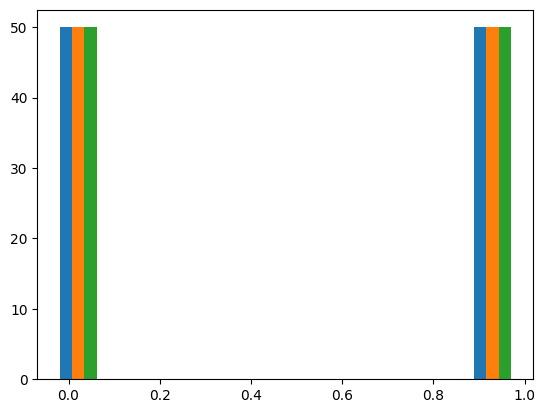

In [122]:
#plotten Sie ein histogram der Vorhersagen, den Mittelwert der Gradienten pro Vorhersage, plotten Sie dann den Fehler vs. die Gradienten
plt.hist(preds)

(array([ 1.,  1.,  2., 47., 22.,  9.,  6.,  4.,  5.,  3.]),
 array([-0.09917451, -0.06970153, -0.04022855, -0.01075557,  0.01871741,
         0.04819039,  0.07766338,  0.10713635,  0.13660933,  0.16608232,
         0.1955553 ]),
 <BarContainer object of 10 artists>)

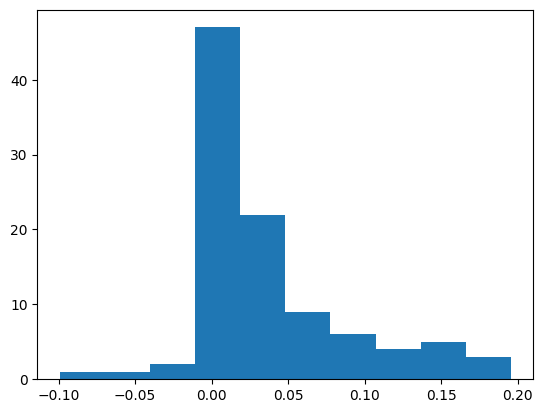

In [123]:
mean_gradients = np.mean(gradients, axis=1)
plt.hist(mean_gradients, bins=10)

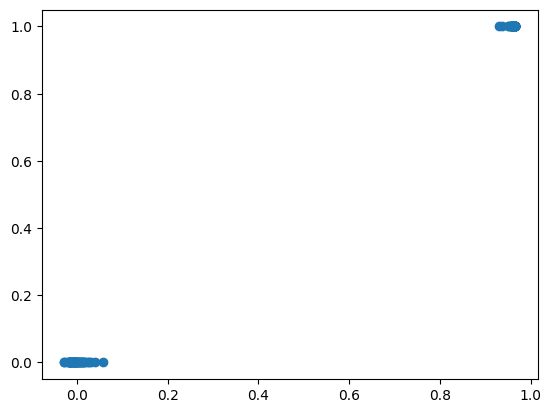

In [136]:
plt.scatter(preds[:, 0], y)

(array([[38.,  5.,  4.,  1., 26., 12.,  6.,  3.,  1.,  1.,  0.,  1.,  0.,
          0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [36., 25., 19., 11.,  2.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [27., 11.,  4., 15., 14., 12.,  2.,  5.,  2.,  2.,  1.,  0.,  2.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  1.]]),
 array([9.42762668e-09, 2.68382062e-04, 5.36754696e-04, 8.05127331e-04,
        1.07349997e-03, 1.34187260e-03, 1.61024523e-03, 1.87861787e-03,
        2.14699050e-03, 2.41536314e-03, 2.68373577e-03, 2.95210841e-03,
        3.22048104e-03, 3.48885368e-03, 3.75722631e-03, 4.02559894e-03,
        4.29397158e-03, 4.56234421e-03, 4.83071685e-03, 5.09908948e-03,
        5.36746212e-03, 5.63583475e-03, 5.90420739e-03, 6.17258002e-03,
        6.44095265e-03, 6.709325

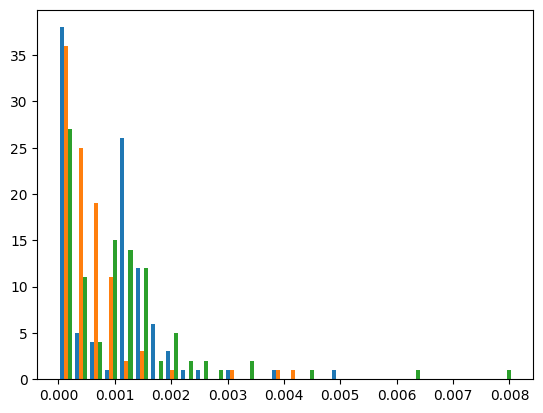

In [137]:
plt.hist((preds - y)**2, bins=30)

In [126]:
# lassen sie das modell nun für 100 Epochen trainieren und fertigen Sie die obrigen plots erneut an und vergleichen sie diese


code from 

In [127]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [128]:
num_classes = 2
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [129]:
model = Sequential()

model.add(Conv2D(32, [3, 3], input_shape = input_shape)) 
model.add(Activation("relu"))
model.add(Conv2D(64, [3, 3],))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/home/mmr/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
hist = model.fit(x_train[:2], y_train[:2], batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6208 - val_accuracy: 0.7680 - val_loss: 0.6438
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 1.0000 - loss: 0.4787 - val_accuracy: 0.8932 - val_loss: 0.5975
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.5000 - loss: 0.7984 - val_accuracy: 0.8762 - val_loss: 0.5408
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 1.0000 - loss: 0.2964 - val_accuracy: 0.9097 - val_loss: 0.4876
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 1.0000 - loss: 0.4089 - val_accuracy: 0.9398 - val_loss: 0.4279
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 1.0000 - loss: 0.2172 - val_accuracy: 0.9408 - val_loss: 0.3768
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 1.0000 - loss: 0.1831 - val_accuracy: 0.9408 - val_loss: 0.3283
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 1.0000 - loss: 0.1571 - val_accuracy: 0.9393 - val_loss: 0.

In [131]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9242 - loss: 0.2784

Test score: 0.2260434329509735
Test accuracy: 0.9427184462547302


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


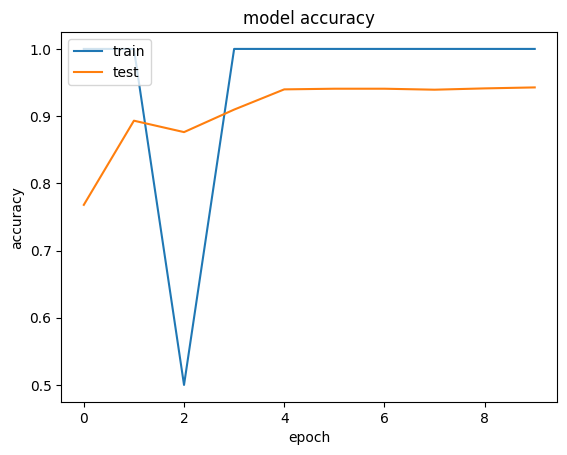

In [132]:
import matplotlib.pyplot as plt
# list all keys in history
print(hist.history.keys())

# visualize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<class 'numpy.ndarray'> (3, 3, 32)

Filter 1 in the first convolution layer : 
[[ 0.10518394  0.01194131  0.08477795]
 [-0.06892841 -0.12385543  0.08508679]
 [-0.01718661  0.12073955  0.08965068]]


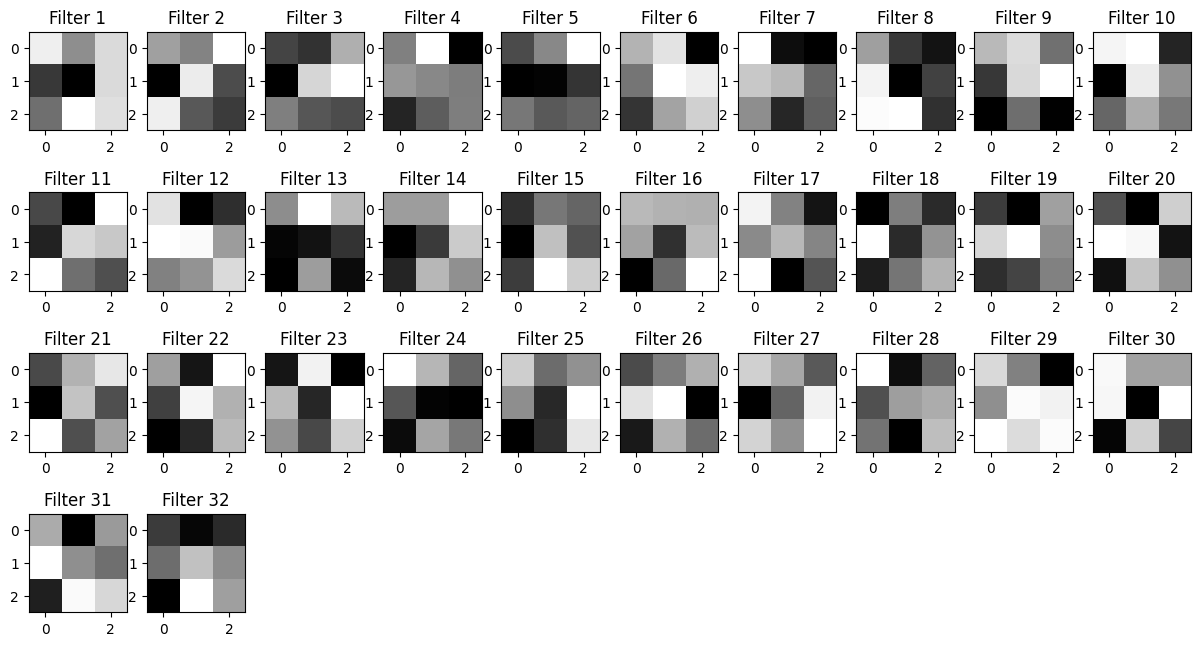

In [133]:
# get the weights of the first convolution layer and visualize the 32 filters

W1 = model.layers[0].get_weights()[0]
W1 = model.layers[0].get_weights()[0][:,:,0,:]

print(type(W1), W1.shape)
print()
print("Filter 1 in the first convolution layer : ")
print(W1[:,:,0])

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(W1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
(26, 26, 32)


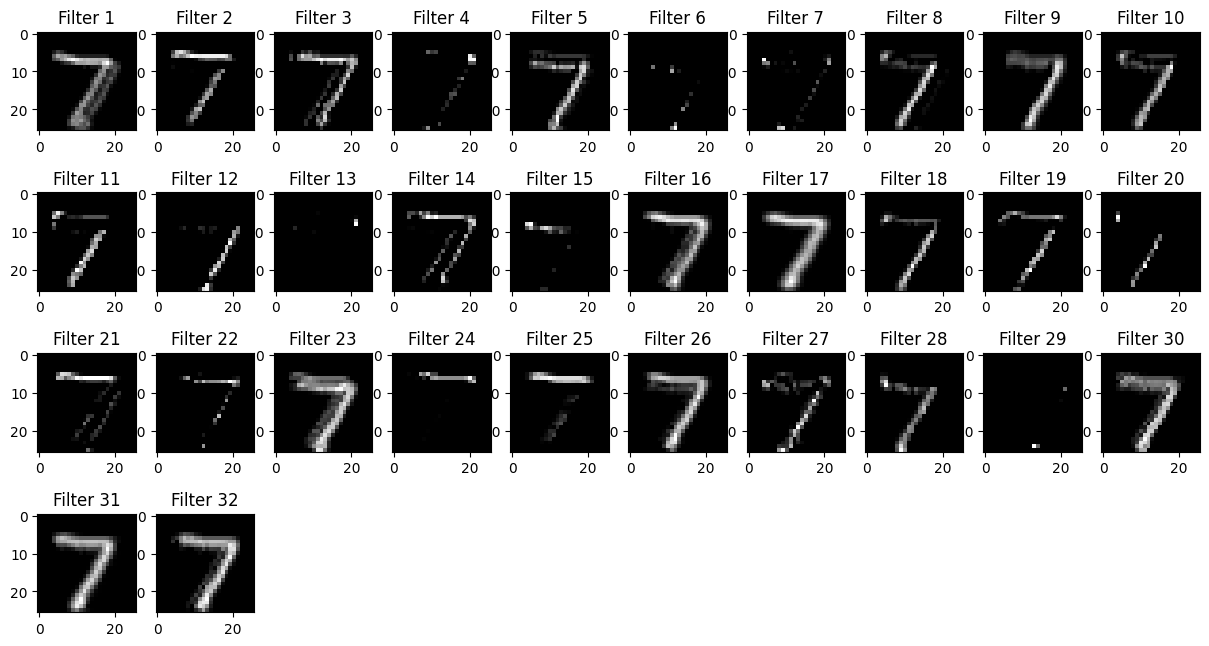

In [142]:
# extract output of the first convolution layer and plot the images from the 32 filters

model2 = Sequential()
model2.add(Conv2D(32, [3, 3])) #, border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model2.add(Activation("relu"))

x_rep = model2.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
(24, 24, 64)


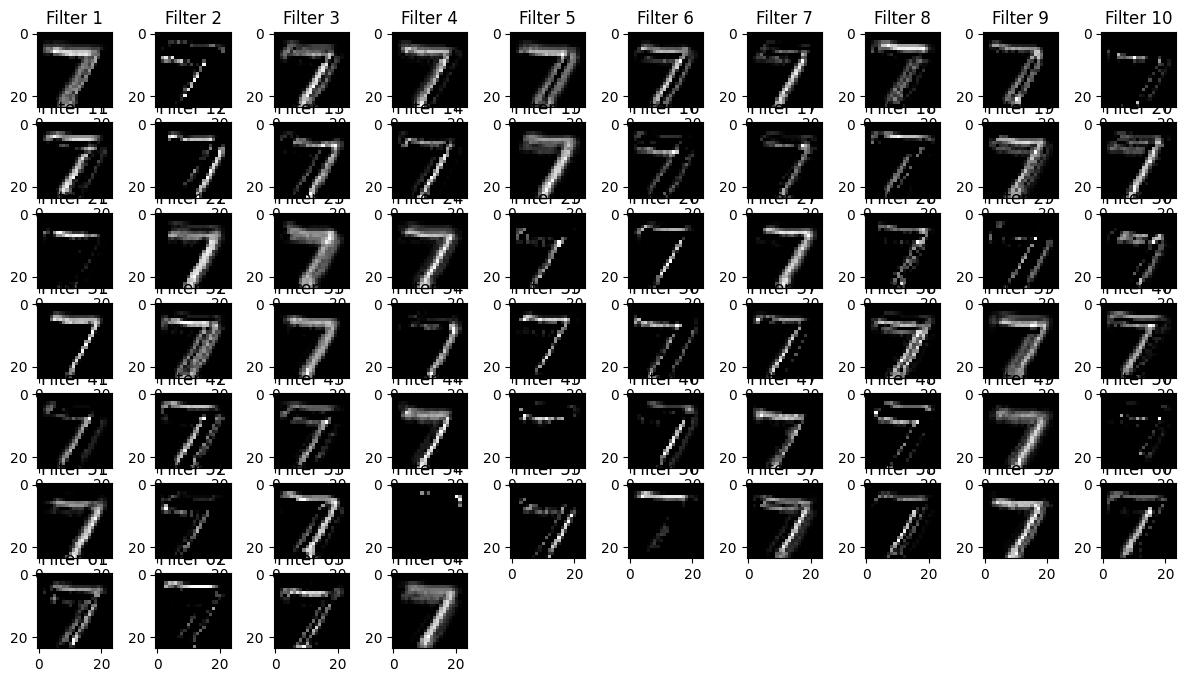

In [143]:
# extract output of the second convolution layer and plot the images from the 64 filters

model3 = Sequential()
model3.add(Conv2D(32, [3, 3])) #, border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model3.add(Activation("relu"))
model3.add(Conv2D(64, [3, 3])) #, border_mode='same', weights=model.layers[2].get_weights()))
model3.add(Activation("relu"))

x_rep = model3.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,64):
    plt.subplot(7,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()